# People_Charm_Case_study

In [1]:
import pandas as pd
import numpy as np


In [2]:
company = pd.read_csv("C:\\Users\\Administrator\\Desktop\\Machine Learning\\prjects\\project2\\Assignment2_PGD B7\\People Charm case.csv")

In [3]:
company_copy = company.copy()

In [4]:
company_copy.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [5]:
company_copy.shape

(14999, 10)

### Checking for the duplicates

In [6]:
company_copy.duplicated(subset=None,keep='first').sum()

3008

In [7]:
# removing the duplicates
company_copy.drop_duplicates(subset=None, keep='first', inplace=True)

In [8]:
company_copy.shape

(11991, 10)

In [9]:
company_copy.duplicated(subset=None,keep='first').sum()

0

## Variable Analysis

In [10]:
company_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 14998
Data columns (total 10 columns):
satisfactoryLevel        11991 non-null float64
lastEvaluation           11991 non-null float64
numberOfProjects         11991 non-null int64
avgMonthlyHours          11991 non-null int64
timeSpent.company        11991 non-null int64
workAccident             11991 non-null int64
left                     11991 non-null int64
promotionInLast5years    11991 non-null int64
dept                     11991 non-null object
salary                   11991 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [11]:
company_copy['dept']=company_copy['dept'].astype('category')

In [12]:
company_copy['salary']=company_copy['salary'].astype('category')

In [13]:
company_copy["dept"].unique()

[sales, accounting, hr, technical, support, IT, product_mng, marketing, management, RandD]
Categories (10, object): [sales, accounting, hr, technical, ..., product_mng, marketing, management, RandD]

In [14]:
company_copy["salary"].unique()

[low, medium, high]
Categories (3, object): [low, medium, high]

In [15]:
 # ordering the categorical values

from pandas.api.types import CategoricalDtype


company_copy_salary = CategoricalDtype(categories=['high','medium','low'],ordered=True)
company_copy["salary"] = company_copy["salary"].astype(company_copy_salary)


### Encoding 

In [16]:
# label encoder for company_copy["salary"] which is ordinal data

from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()

company_copy["salary_L"]=x1.fit_transform(company_copy["salary"])

In [17]:
company_copy.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary,salary_L
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.37,0.52,2,159,3,0,1,0,sales,low,1
4,0.41,0.50,2,153,3,0,1,0,sales,low,1


In [18]:
# get dummies for the company_copy['dept'] nominal data

x = pd.get_dummies(company_copy['dept'],prefix='dept')


In [19]:
company_copy1 = pd.concat([company_copy,x],axis=1)
company_copy1.shape

(11991, 21)

In [20]:
company_copy1=company_copy1.drop(['dept','salary'],axis=1)


In [21]:
company_copy1.dtypes

satisfactoryLevel        float64
lastEvaluation           float64
numberOfProjects           int64
avgMonthlyHours            int64
timeSpent.company          int64
workAccident               int64
left                       int64
promotionInLast5years      int64
salary_L                   int32
dept_IT                    uint8
dept_RandD                 uint8
dept_accounting            uint8
dept_hr                    uint8
dept_management            uint8
dept_marketing             uint8
dept_product_mng           uint8
dept_sales                 uint8
dept_support               uint8
dept_technical             uint8
dtype: object

### Descriptive Statistics

In [22]:
company_copy.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,salary_L
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,1.356184
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.628071
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


### Class Distribution

In [23]:
class_counts = company_copy.groupby("left").size()
class_counts

left
0    10000
1     1991
dtype: int64

In [124]:
 #percent of classes
print("Percent of the Class (1) is",(class_counts[1]/11991)*100)  
print("Percent of the Class (0) is",(class_counts[0]/11991)*100)

# the results are showing that there is imbalance of class

Percent of the Class (1) is 16.604119756484028
Percent of the Class (0) is 83.39588024351598


### Correlation

In [25]:
pd.set_option('precision', 3)

correlations = company_copy.corr(method='pearson')                                         # correlation of each columns

### Skewness of Univariate

In [26]:
skew = company_copy.skew()
skew                            # checking the data with positive & negative skewed

satisfactoryLevel       -0.539
lastEvaluation          -0.032
numberOfProjects         0.332
avgMonthlyHours          0.027
timeSpent.company        1.817
workAccident             1.914
left                     1.795
promotionInLast5years    7.490
salary_L                -0.446
dtype: float64

### Univariate Plots

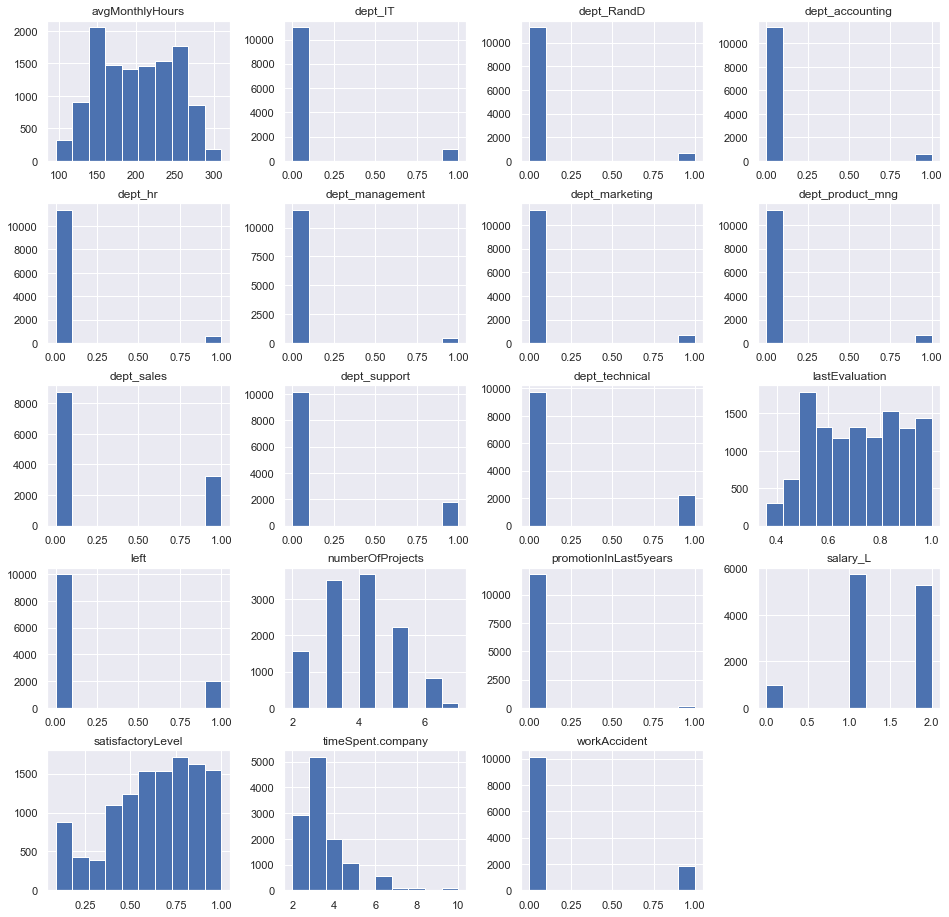

In [125]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,16]
company_copy1.hist()
plt.show()

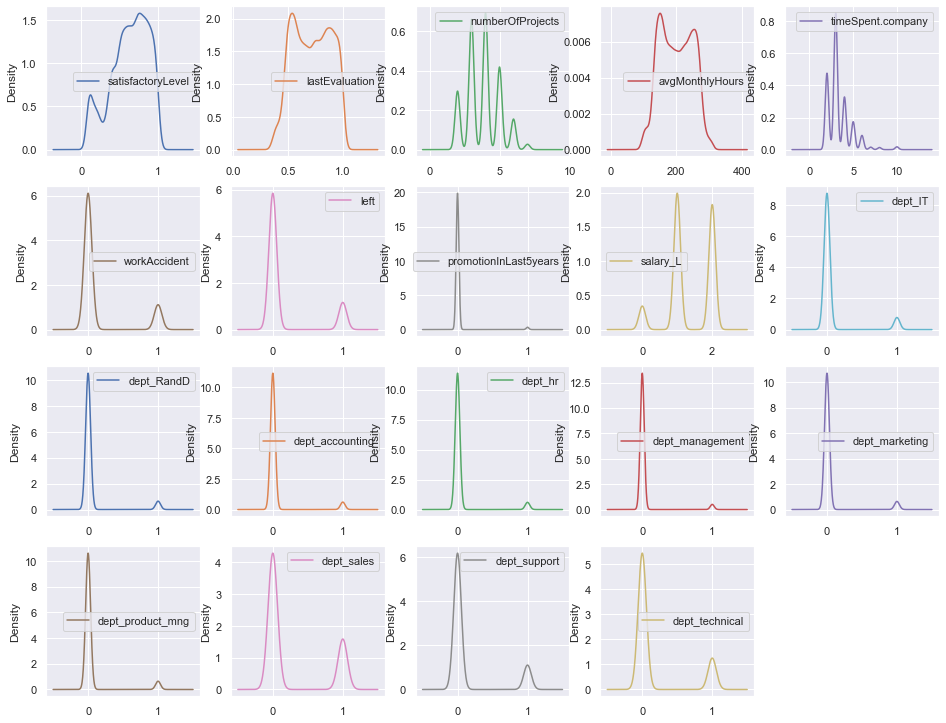

In [127]:
plt.rcParams["figure.figsize"] = [16,16]
company_copy1.plot(kind="density",subplots=True,layout=(5,5),sharex=False)
plt.show()

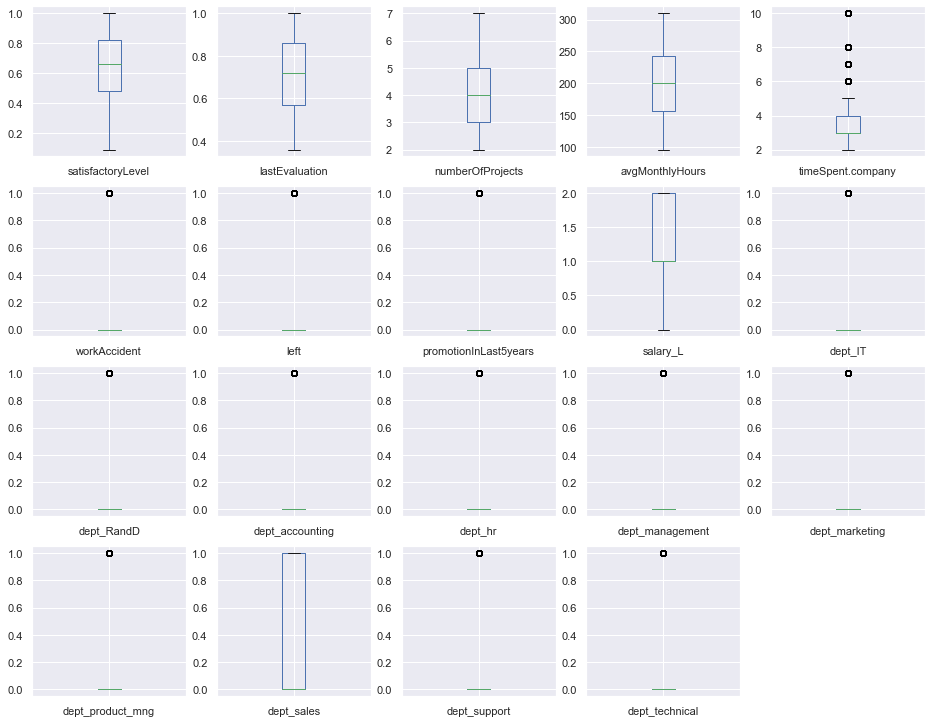

In [128]:
plt.rcParams["figure.figsize"] = [16,16]
company_copy1.plot(kind="box",subplots=True,layout=(5,5),sharex=False,sharey=False)
plt.show()

### Multivariate Analysis 

In [30]:
correlation = company_copy1.corr()
import seaborn as sn

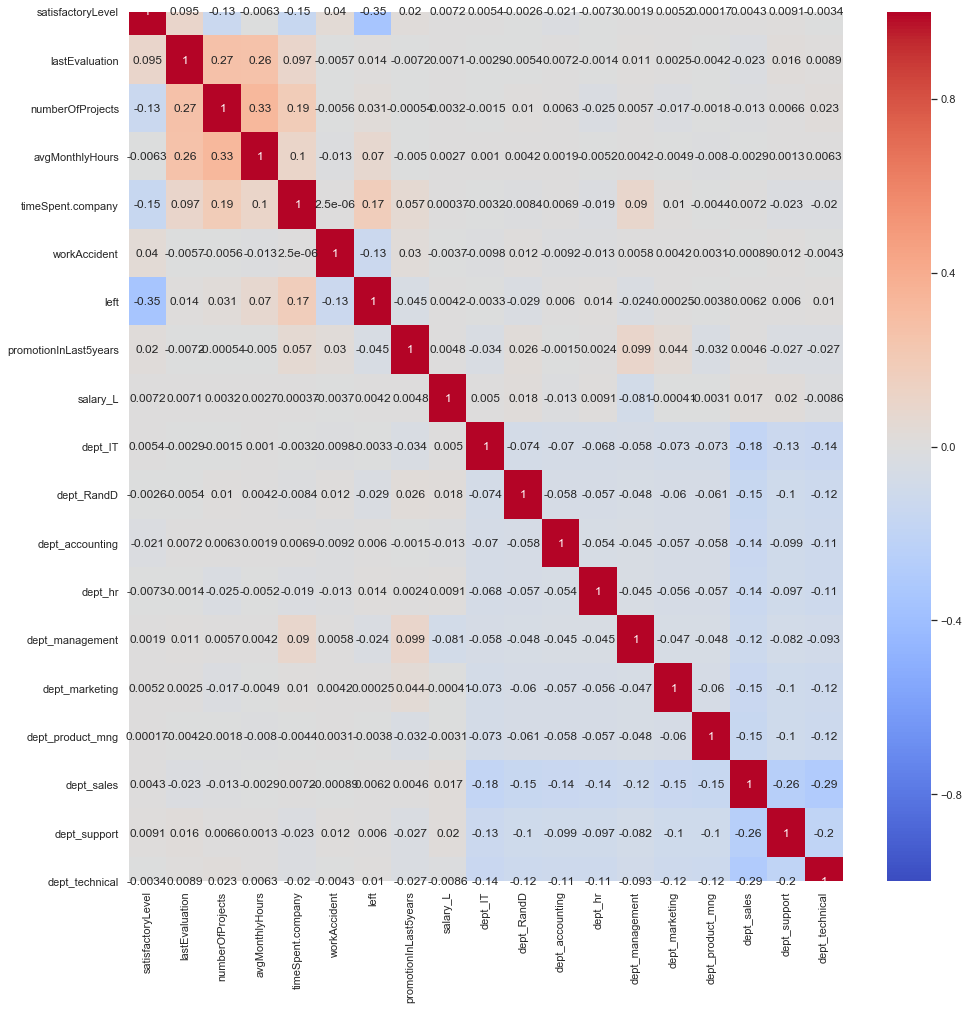

In [129]:
#plt.figure(figsize=(8, 6)) 

sn.set(font_scale=1)
sn.heatmap(company_copy1.corr(),annot=True,vmin=-1,cmap='coolwarm')

plt.show()

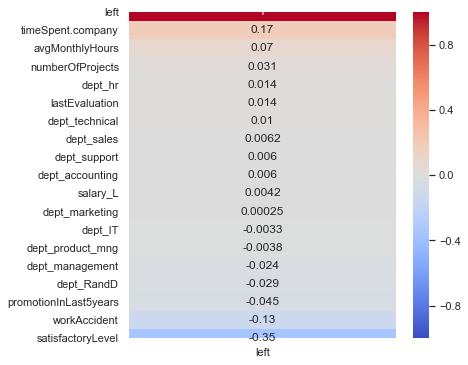

In [32]:
# correlation with target variable

plt.figure(figsize=(6,6))
sn.heatmap(correlation[['left']].sort_values(by=['left'],ascending=False),vmin=-1,
            cmap='coolwarm',
            annot=True);

In [33]:
company_copy1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,salary_L,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


### Normalisation 

In [34]:
# MinMax scaler

X= company_copy1.drop(['left'],axis=1)
Y= company_copy1['left']

In [35]:
from sklearn.preprocessing import MinMaxScaler
#creating object
mmsc=MinMaxScaler()
mmsc_data= mmsc.fit_transform(X)
mmsc_data=pd.DataFrame(mmsc_data)
mmsc_data
mmsc_data.columns = X.columns
mmsc_data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,salary_L,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.319,0.266,0.0,0.285,0.125,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.780,0.781,0.6,0.776,0.500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.022,0.812,1.0,0.822,0.250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.308,0.250,0.0,0.294,0.125,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.352,0.219,0.0,0.266,0.125,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Standardisation

In [36]:
from sklearn.preprocessing import StandardScaler
#creating object
sc=StandardScaler()
sc_data= sc.fit_transform(X)
sc_data=pd.DataFrame(sc_data)
sc_data
sc_data.columns = X.columns
#sc_data.head()

# K Nearest Neighbour
## Intializing the Knn (without normalisation)

In [37]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [38]:
X= company_copy1.drop(['left'],axis=1)
Y= company_copy1['left']
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [39]:
k_list= list(range(1,31))
d=[]
for i in k_list:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predection =knn.predict(X_test)
    cn = confusion_matrix(y_test,predection)
    
    d.append(np.mean(predection != y_test))

Text(0.5, 1.0, 'k value v/s error rate')

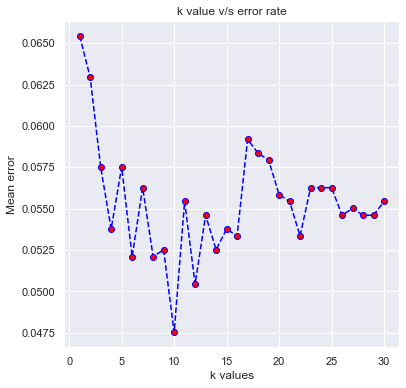

In [40]:
plt.figure(figsize=(6,6))
plt.plot(k_list,d,color="blue",marker='o', linestyle='dashed',markerfacecolor="red",markersize=6)
plt.xlabel("k values")
plt.ylabel("Mean error")
plt.title("k value v/s error rate")

###### On the basis of the graph we will choose the value of K as "10" with error of 0.045 of Mean Error

In [133]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
print("knn score",knn.score(X_test,y_test)*100)
predection =knn.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")

knn score 95.24802000833681
confusion Matrix is 
[[1935   72]
 [  42  350]]


### Intializing the Knn (with MinMax normalisation)

In [134]:
# It is useful to scale the input attributes for a model that relies on the magnitude of values, 
    #such as distance measures used in k-nearest neighbors

In [135]:
# taking the mmsc_data which is the normalised values of the input data
X_train,X_test,y_train,y_test = train_test_split(mmsc_data, Y, test_size = 0.2, random_state = 0)

In [136]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
print("knn score",knn.score(X_test,y_test)*100)
predection =knn.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")

knn score 94.33097123801583
confusion Matrix is 
[[1941   66]
 [  70  322]]


### Intializing the Knn (with StandardScaler normalisation)

In [45]:
# taking the mmsc_data which is the normalised values of the input data
X_train,X_test,y_train,y_test = train_test_split(sc_data, Y, test_size = 0.2, random_state = 0)

In [137]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
print("knn score",knn.score(X_test,y_test)*100)
predection =knn.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")

knn score 94.33097123801583
confusion Matrix is 
[[1941   66]
 [  70  322]]


##### Choosing the standard scaler as the  final normalisation which has high accuracy
### Applying the Principal Component Analysis  

In [47]:
from sklearn.decomposition import PCA
PCA_data = PCA().fit(sc_data)

In [48]:
var= PCA_data.explained_variance_ratio_

var

array([9.30345680e-02, 7.33124694e-02, 6.76966410e-02, 6.70403101e-02,
       6.36589182e-02, 6.23019431e-02, 6.03612202e-02, 5.95571723e-02,
       5.90656250e-02, 5.87665583e-02, 5.85066579e-02, 5.51632016e-02,
       5.40158884e-02, 4.87112794e-02, 4.48499641e-02, 3.91563691e-02,
       3.48012139e-02, 6.13345989e-33])

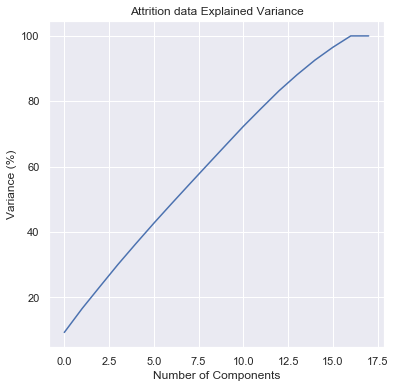

In [49]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(var)*100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Attrition data Explained Variance')
plt.show()

#### On the basis of above graph  we will choose no. of components as 15 with  ( 98 % )  variance

In [208]:
pca = PCA(n_components=15)
PCA_Scaled_data = pca.fit_transform(sc_data)

In [209]:
# taking the mmsc_data which is the pca analysied values of the input data
X_train,X_test,y_train,y_test = train_test_split(PCA_Scaled_data, Y, test_size = 0.2, random_state = 0)

In [210]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print("knn score",knn.score(X_test,y_test)*100)
predection =knn.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")

knn score 95.20633597332223
confusion Matrix is 
[[1949   58]
 [  57  335]]


## Choosing the Standard Scaler with PCA gives the best    accuracy of 
### ( 95.20 %)

In [138]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, predection, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.97      0.97      2007
     class 1       0.83      0.82      0.83       392

    accuracy                           0.94      2399
   macro avg       0.90      0.89      0.90      2399
weighted avg       0.94      0.94      0.94      2399



### ROC curve

In [54]:
#prob
prob= knn.predict_proba(X_test)
cn=confusion_matrix(y_test,predection)
print(cn)
print(accuracy_score(y_test,predection))

[[1949   58]
 [  57  335]]
0.9520633597332222


In [55]:
from sklearn import metrics

prob_positive= prob[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.937780269058296


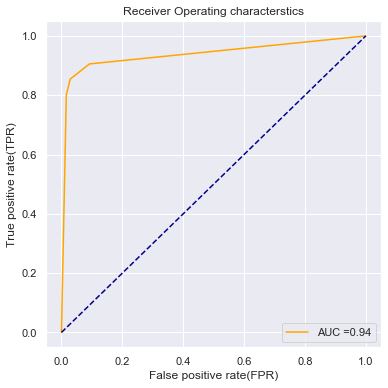

In [56]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

plt.title("Receiver Operating characterstics")
plt.plot(fpr,tpr,'orange',label= 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='darkblue',ls='--')
plt.ylabel('True positive rate(TPR)')
plt.xlabel('False positive rate(FPR)')
plt.show()

## Choosing the Knn ( Standard Scaler with PCA gives ) gives the 
# Area under the curve of    ( 0.94 )

## LogisticRegression

## Intializing the Logistic (without normalisation)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [58]:
X= company_copy1.drop(['left'],axis=1)
Y= company_copy1['left']

In [59]:
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=0.3,random_state=0)

In [60]:
logreg= LogisticRegression()

In [61]:
logreg.fit(X_train,y_train)
print("logreg score",logreg.score(X_test,y_test)*100)
predection =logreg.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")

logreg score 84.40800444691496
confusion Matrix is 
[[2908  107]
 [ 454  129]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Intializing the Logistic (MinMax normalisation)

In [62]:
# taking the mmsc_data which is the normalised values of the input data
X_train,X_test,y_train,y_test = train_test_split(mmsc_data, Y, test_size = 0.2, random_state = 0)

In [63]:
logreg.fit(X_train,y_train)
print("logreg score",logreg.score(X_test,y_test)*100)
predection =logreg.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")

logreg score 84.53522300958733
confusion Matrix is 
[[1942   65]
 [ 306   86]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Intializing the Logistic (Standard Scalar normalisation)

In [64]:
# taking the sc_data which is the normalised values of the input data
X_train,X_test,y_train,y_test = train_test_split(sc_data, Y, test_size = 0.2, random_state = 0)

In [65]:
logreg.fit(X_train,y_train)
print("logreg score",logreg.score(X_test,y_test)*100)
predection =logreg.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")

logreg score 84.36848686952897
confusion Matrix is 
[[1938   69]
 [ 306   86]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Applying the Principal Component Analysis on MinMax scaler

In [148]:
from sklearn.decomposition import PCA
PCA_data = PCA().fit(mmsc_data)

In [149]:
var= PCA_data.explained_variance_ratio_

var

array([1.72890543e-01, 1.23580917e-01, 9.58731554e-02, 8.20966758e-02,
       7.24187036e-02, 6.87410871e-02, 5.50925033e-02, 5.38786650e-02,
       4.21950542e-02, 4.15240831e-02, 3.89774053e-02, 3.71768523e-02,
       3.22067291e-02, 2.82065925e-02, 2.52610695e-02, 1.80676310e-02,
       1.18123330e-02, 1.06077128e-32])

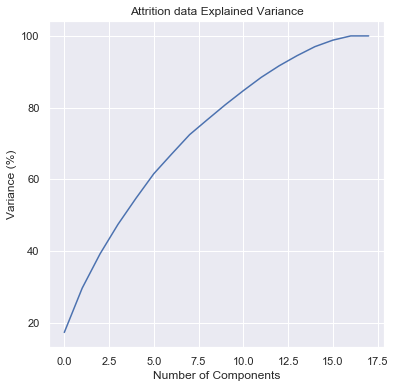

In [150]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(var)*100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Attrition data Explained Variance')
plt.show()

###  On the basis of above graph  we will choose no. of components as 16


In [166]:
pca = PCA(n_components=16)
PCA_Scaled_data = pca.fit_transform(X)

In [167]:
X_train,X_test,y_train,y_test = train_test_split(PCA_Scaled_data, Y, test_size = 0.2, random_state = 0)

In [168]:
logreg.fit(X_train,y_train)
print("logreg score",logreg.score(X_test,y_test)*100)
predection =logreg.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")

logreg score 84.61859107961651
confusion Matrix is 
[[1943   64]
 [ 305   87]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Choosing the PCA gives the best    accuracy of 
### ( 84.61%)

In [169]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, predection, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.97      0.91      2007
     class 1       0.58      0.22      0.32       392

    accuracy                           0.85      2399
   macro avg       0.72      0.60      0.62      2399
weighted avg       0.82      0.85      0.82      2399



### ROC Curve

In [170]:
#prob
prob= logreg.predict_proba(X_test)
cn=confusion_matrix(y_test,predection)
print(cn)
print(accuracy_score(y_test,predection))

[[1943   64]
 [ 305   87]]
0.8461859107961651


In [171]:
from sklearn import metrics

prob_positive= prob[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.8324270664917687


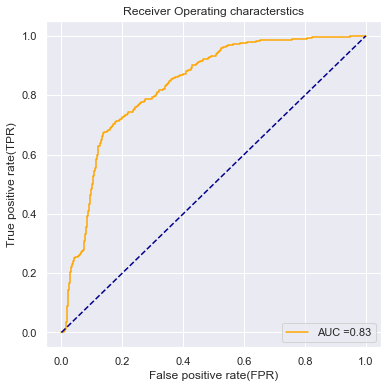

In [172]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

plt.title("Receiver Operating characterstics")
plt.plot(fpr,tpr,'orange',label= 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='darkblue',ls='--')
plt.ylabel('True positive rate(TPR)')
plt.xlabel('False positive rate(FPR)')
plt.show()

## The Logistic Regression with MinMax Scaler nd Pca gives AUC : 0 .83

## Probability Base Classifications

•	Naïve Bayes
•	Decision Tree
•	Random Forest
•	Adaboost
•	Gradient Boosting
•	XG Boost
  

### Naive Bayes  (without  normalisation)

In [76]:
X= company_copy1.drop(['left'],axis=1)
Y= company_copy1['left']

In [77]:
from sklearn.naive_bayes import GaussianNB 

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
naive=GaussianNB()


In [79]:
naive.fit(X_train,y_train)
predection =naive.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")
score = accuracy_score(y_test,predection)*100
print("The accuracy is : ",score)

confusion Matrix is 
[[1709  298]
 [ 118  274]]
The accuracy is :  82.65944143393081


### Applying the Principal Component Analysis 

In [173]:
from sklearn.decomposition import PCA
PCA_data = PCA().fit(X)

In [174]:
var= PCA_data.explained_variance_ratio_

var

array([9.98139022e-01, 7.74935198e-04, 4.68970878e-04, 1.66034825e-04,
       9.89913472e-05, 7.08448100e-05, 5.49395716e-05, 4.68930512e-05,
       3.10396378e-05, 2.42147158e-05, 2.39660327e-05, 2.37339986e-05,
       2.22689400e-05, 2.13112029e-05, 1.58035911e-05, 1.02300511e-05,
       6.80045199e-06, 5.43281952e-36])

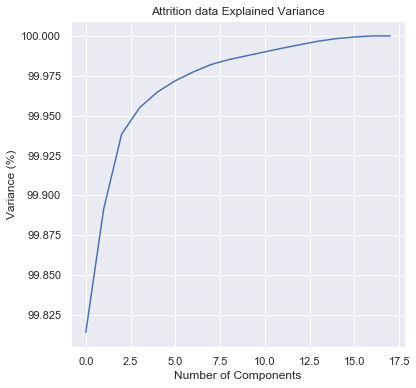

In [175]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(var)*100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Attrition data Explained Variance')
plt.show()

###  On the basis of above graph  we will choose no. of components as 13


In [194]:
pca = PCA(n_components=13)
PCA_Scaled_data = pca.fit_transform(X)

In [195]:
X_train,X_test,y_train,y_test = train_test_split(PCA_Scaled_data, Y, test_size = 0.2, random_state = 0)

In [196]:
naive.fit(X_train,y_train)
predection =naive.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")
score = accuracy_score(y_test,predection)*100
print("The accuracy is : ",score)

confusion Matrix is 
[[1890  117]
 [ 273  119]]
The accuracy is :  83.74322634431013


In [197]:
#prob
prob= naive.predict_proba(X_test)
cn=confusion_matrix(y_test,predection)
print(cn)
print(accuracy_score(y_test,predection))

[[1890  117]
 [ 273  119]]
0.8374322634431013


In [198]:
from sklearn import metrics

prob_positive= prob[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.8267848245426721


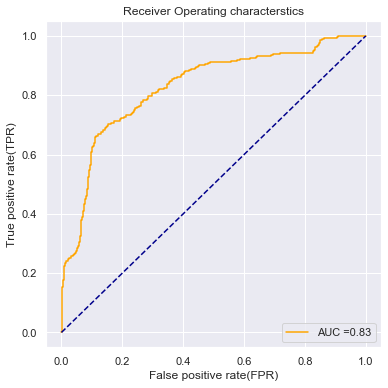

In [199]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

plt.title("Receiver Operating characterstics")
plt.plot(fpr,tpr,'orange',label= 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='darkblue',ls='--')
plt.ylabel('True positive rate(TPR)')
plt.xlabel('False positive rate(FPR)')
plt.show()

## Niave Bayes with PCA gives AUC :  ( 0.83 )

# •	Decision Tree

In [200]:
from sklearn.tree import DecisionTreeClassifier

In [201]:
X= company_copy1.drop(['left'],axis=1)
Y= company_copy1['left']

In [202]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Tree = DecisionTreeClassifier(criterion="entropy")


In [203]:
Tree.fit(X_train,y_train)
predection =Tree.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")
score = accuracy_score(y_test,predection)*100
print("The accuracy is : ",score)

confusion Matrix is 
[[1956   51]
 [  27  365]]
The accuracy is :  96.74864526886202


In [93]:
#prob
prob= Tree.predict_proba(X_test)

In [94]:
from sklearn import metrics

prob_positive= prob[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.9531048218988643


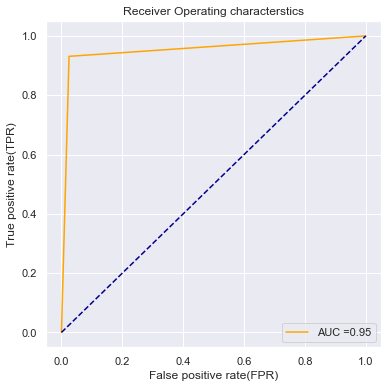

In [95]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

plt.title("Receiver Operating characterstics")
plt.plot(fpr,tpr,'orange',label= 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='darkblue',ls='--')
plt.ylabel('True positive rate(TPR)')
plt.xlabel('False positive rate(FPR)')
plt.show()

## Decision Tree gives the AUC :  0.9531


# •	Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier


In [216]:
X= company_copy1.drop(['left'],axis=1)
Y= company_copy1['left']
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [217]:
rf = RandomForestClassifier(n_estimators = 100,random_state=0 )


In [218]:
rf.fit(X_train,y_train)
predection =rf.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")
score = accuracy_score(y_test,predection)*100
print("The accuracy is : ",score)

confusion Matrix is 
[[1998    9]
 [  33  359]]
The accuracy is :  98.24927052938725


In [219]:
#prob
prob= rf.predict_proba(X_test)

In [220]:
from sklearn import metrics

prob_positive= prob[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.9799305746214779


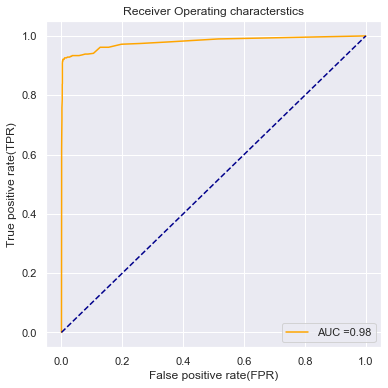

In [221]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

plt.title("Receiver Operating characterstics")
plt.plot(fpr,tpr,'orange',label= 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='darkblue',ls='--')
plt.ylabel('True positive rate(TPR)')
plt.xlabel('False positive rate(FPR)')
plt.show()

##  Random Forest gives the AUC:  0.9799


## •	Adaboost

In [103]:
from sklearn.ensemble import AdaBoostClassifier

In [222]:
X= company_copy1.drop(['left'],axis=1)
Y= company_copy1['left']
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [223]:
ab = AdaBoostClassifier(n_estimators = 100,random_state=0 )


In [224]:
ab.fit(X_train,y_train)
predection =ab.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")
score = accuracy_score(y_test,predection)*100
print("The accuracy is : ",score)

confusion Matrix is 
[[1961   46]
 [  42  350]]
The accuracy is :  96.33180491871613


In [225]:
#prob
prob= ab.predict_proba(X_test)

In [226]:
from sklearn import metrics

prob_positive= prob[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.9781021526697375


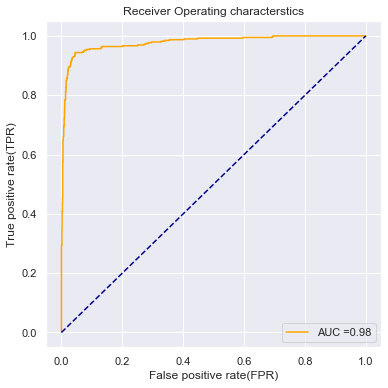

In [227]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

plt.title("Receiver Operating characterstics")
plt.plot(fpr,tpr,'orange',label= 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='darkblue',ls='--')
plt.ylabel('True positive rate(TPR)')
plt.xlabel('False positive rate(FPR)')
plt.show()

##  AdaBoost gives the AUC : 0.9781


## •	Gradient Boosting

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

In [228]:
X= company_copy1.drop(['left'],axis=1)
Y= company_copy1['left']
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [229]:
gb = GradientBoostingClassifier(n_estimators = 100,random_state=0 )


In [230]:
gb.fit(X_train,y_train)
predection =gb.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")
score = accuracy_score(y_test,predection)*100
print("The accuracy is : ",score)

confusion Matrix is 
[[1989   18]
 [  28  364]]
The accuracy is :  98.08253438932888


In [231]:
#prob
prob= gb.predict_proba(X_test)

In [232]:
from sklearn import metrics

prob_positive= prob[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.9873065444413939


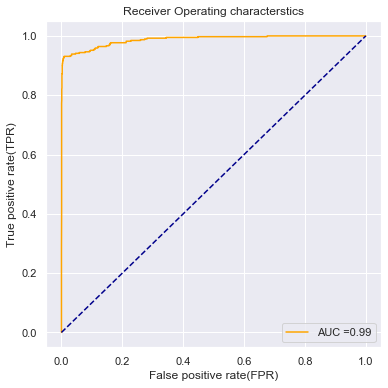

In [233]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

plt.title("Receiver Operating characterstics")
plt.plot(fpr,tpr,'orange',label= 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='darkblue',ls='--')
plt.ylabel('True positive rate(TPR)')
plt.xlabel('False positive rate(FPR)')
plt.show()

## The GradiantBoost gives AUC :  0.9873


# •	XG Boost

In [117]:
from xgboost import XGBClassifier

In [303]:
X= company_copy1.drop(['left'],axis=1)
Y= company_copy1['left']
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [308]:
type(X_test)

pandas.core.frame.DataFrame

In [304]:
xb = XGBClassifier(n_estimators = 100,random_state=0 )

In [309]:
xb.fit(X_train,y_train)
predection =xb.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")
score = accuracy_score(y_test,predection)*100
print("The accuracy is : ",score)

confusion Matrix is 
[[1990   17]
 [  31  361]]
The accuracy is :  97.99916631929972


In [237]:
#prob
prob= xb.predict_proba(X_test)

In [238]:
from sklearn import metrics

prob_positive= prob[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.9862528344671202


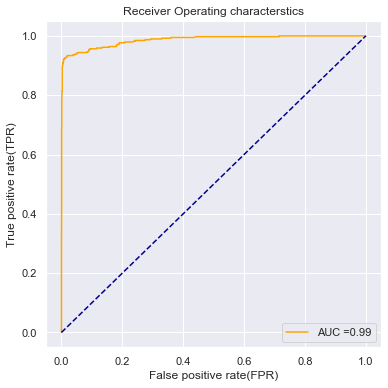

In [239]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

plt.title("Receiver Operating characterstics")
plt.plot(fpr,tpr,'orange',label= 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='darkblue',ls='--')
plt.ylabel('True positive rate(TPR)')
plt.xlabel('False positive rate(FPR)')
plt.show()

## The XgBoost gives the AUC :  0.9862


### As there is Class imbalacement trying to improve the fpr and the area under the ROC-curve using       SMOTE (Synthetic Minority Over-sampling Technique ) & ADASYN 

In [214]:
import warnings
warnings.filterwarnings("ignore")

In [215]:
from imblearn.over_sampling import SMOTE

### SMOTE with Xgboost

In [380]:
X= company_copy1.drop(['left'],axis=1)
Y= company_copy1['left']


In [381]:
# Class count before SMOTE
Y.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [382]:
smt = SMOTE()
X_1, y_1 = smt.fit_sample(X,Y)

In [383]:
# Class count after SMOTE
np.bincount(y_1)

array([10000, 10000], dtype=int64)

In [384]:
X_train,X_test,y_train,y_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 0)

In [385]:
xb = XGBClassifier(n_estimators = 100,random_state=0 )

In [386]:
xb.fit(X_train,y_train)
predection =xb.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")
score = accuracy_score(y_test,predection)*100
print("The accuracy is : ",score)

confusion Matrix is 
[[1976   38]
 [  69 1917]]
The accuracy is :  97.32499999999999


In [387]:
#prob
prob= xb.predict_proba(X_test)
cn=confusion_matrix(y_test,predection)
print(cn)
print(accuracy_score(y_test,predection))

[[1976   38]
 [  69 1917]]
0.97325


In [388]:
from sklearn import metrics

prob_positive= prob[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.9953407716978132


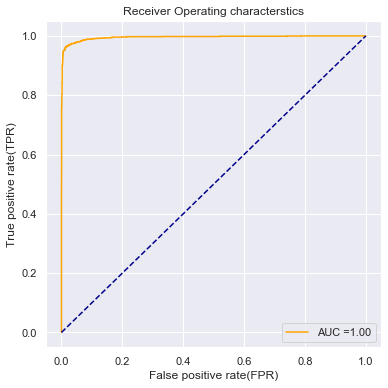

In [389]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

plt.title("Receiver Operating characterstics")
plt.plot(fpr,tpr,'orange',label= 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='darkblue',ls='--')
plt.ylabel('True positive rate(TPR)')
plt.xlabel('False positive rate(FPR)')
plt.show()

In [390]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, predection, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.98      0.97      2014
     class 1       0.98      0.97      0.97      1986

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



## The AUC using the SMOTE with extreme Gradient Boost is : 0.9953

#### XGboost and ADASYN

In [391]:
from imblearn.over_sampling import ADASYN

In [392]:
X= company_copy1.drop(['left'],axis=1)
Y= company_copy1['left']

# Class count before ADASYN
Y.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [393]:
sm = ADASYN()

In [394]:
X_1, y_1 = sm.fit_sample(X,Y)

In [395]:
np.bincount(y_1)

array([10000, 10056], dtype=int64)

In [396]:
X_train,X_test,y_train,y_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 0)

In [397]:
xb = XGBClassifier(n_estimators = 100,random_state=0 )

In [398]:
xb.fit(X_train,y_train)
predection =xb.predict(X_test)
cn = confusion_matrix(y_test,predection)
print("confusion Matrix is ", cn,sep="\n")
score = accuracy_score(y_test,predection)*100
print("The accuracy is : ",score)

confusion Matrix is 
[[1916   72]
 [  52 1972]]
The accuracy is :  96.90927218344964


In [399]:
#prob
prob= xb.predict_proba(X_test)
cn=confusion_matrix(y_test,predection)
print(cn)
print(accuracy_score(y_test,predection))

[[1916   72]
 [  52 1972]]
0.9690927218344965


In [400]:
from sklearn import metrics

prob_positive= prob[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print("Area under the curve",roc_auc)

Area under the curve 0.9941739120493713


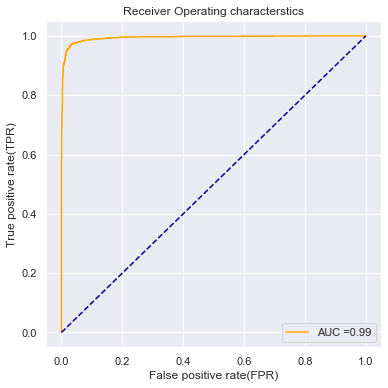

In [401]:
# plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

plt.title("Receiver Operating characterstics")
plt.plot(fpr,tpr,'orange',label= 'AUC =%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],color='darkblue',ls='--')
plt.ylabel('True positive rate(TPR)')
plt.xlabel('False positive rate(FPR)')
plt.show()

In [402]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, predection, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.96      0.97      1988
     class 1       0.96      0.97      0.97      2024

    accuracy                           0.97      4012
   macro avg       0.97      0.97      0.97      4012
weighted avg       0.97      0.97      0.97      4012



## The AUC using the ADASYN with Extreme Gradient Boost is : 0.9941

# Conclusion :

In [377]:
##  Knn ( Standard Scaler with PCA gives ) gives the AUC : 0.94
         
## The Logistic Regression with MinMax Scaler nd Pca gives AUC : 0 .8324

## Niave Bayes with PCA gives AUC :  0.8267 

## Decision Tree gives the AUC :  0.9531

##  Random Forest gives the AUC:  0.9799

##  AdaBoost gives the AUC : 0.9781

## The GradiantBoost gives AUC :  0.9873

## The XgBoost gives the AUC :  0.9862 '

## The XgBoost & SMOTE gives the AUC : 0.9953

## The XgBoost & ADASYN gives the AUC : 0.9941

- As it was found in the later stages that the accuracy going very the reason for that was the duplicates and the class imbalance , so so duplicates were removed from initial stages and the the AUC were cheked and then theclass imbalance was handdled by using the Over sampling Techinques over the best models with the AUC before 

- Class imbalance is curse and has to be taken care , becoz the model turns up with high accuracy but the internally it lerans to classify the majority class hence to over come there were two ways 

- Under sampeling Techniques :- In this the objects of the majority class are brought in range by cutting the down its sample ,genrally it is not recomended .so,

- tried the Over sampling techniques like:- Smote(Synthetic Minority Over-sampling Technique) in which the the no. of minority class objects are increased by using the Knn concepts.
- I have also tried the ADASYN which works on same concept but also gives the random sample weights making it more realistic

## The best resuls were accumulate by Smote with Xgboost . The Area Under the curve is : 0.9953


- Submitted By : Ayush Jha
- Machine Learning 
- Section : 7B